In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models

from imutils import paths
from pathlib import Path
import os
import sys
import time
import copy

import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

# Local modules
sys.path.append('../src')
from train import train_model
from visualize import imshow, visualize_model
from utils import unpickle

In [2]:
# Script runtime options
models = ['googlenet','inception_v3','inceptionv4','pnasnet5large','resnet152','resnext101_32x8d','resnext101_64x4d']
data_root_dir = '../data'
model_root_dir = '../models'
stages = ['test']

In [3]:
# Setup the device to run the computations
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device: {}'.format(device))

Device: cuda:0


In [5]:
# Load model training history
history = {}
class_report = {}
confusion_matrix = {}
for model in models:
    data_dir = os.path.join(data_root_dir,'images')
    output_dir = os.path.join(model_root_dir,'classification/{}'.format(model))
    model_history = os.path.join(output_dir,'model_history.pkl')
    model_file = os.path.join(output_dir, 'caltech_birds_{}_full.pth'.format(model))
    
    #with open(model_history,'rb') as file:
    #    history[model] = torch.load(file, map_location=lambda storage, location: 'cpu')
    history[model] = unpickle(model_history)
    class_report[model] = unpickle(os.path.join(output_dir,'classification_report.pkl')) #, map_location=lambda storage, location: 'cpu')
    confusion_matrix[model] = unpickle(os.path.join(output_dir,'confusion_matrix.pkl')) #, map_location=lambda storage, location: 'cpu')

In [62]:
history['googlenet'].keys()

dict_keys(['epoch', 'train_loss', 'test_loss', 'train_acc', 'test_acc'])

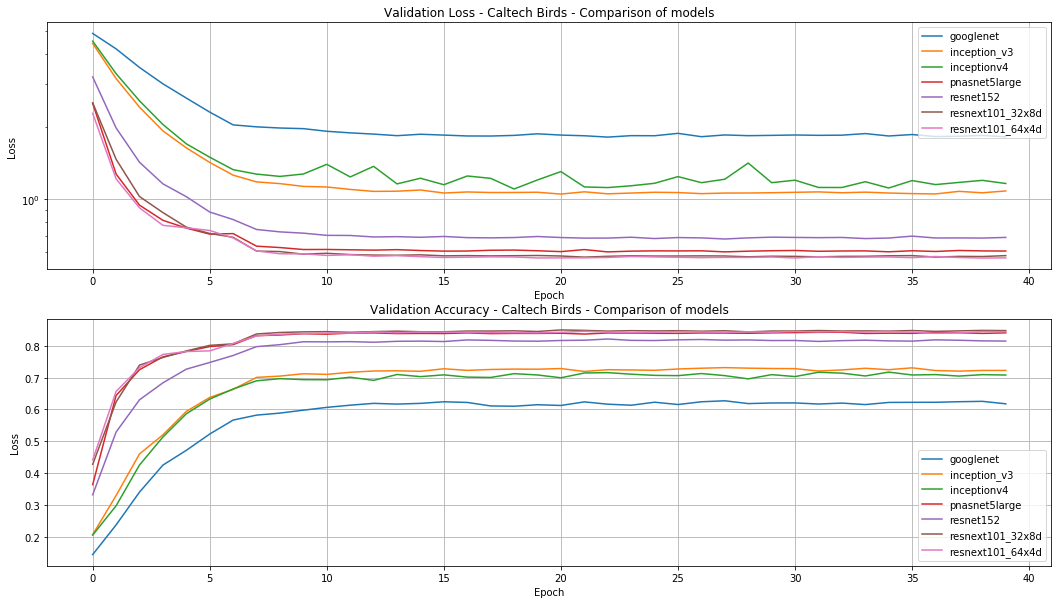

In [17]:
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
for model in models:
    plt.plot(np.arange(0, np.max(history[model]['epoch'])+1,1), history[model]['test_loss'], label=model)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Validation Loss - Caltech Birds - Comparison of models')
plt.legend()

plt.subplot(2,1,2)
for model in models:
    plt.plot(np.arange(0, np.max(history[model]['epoch'])+1,1), history[model]['test_acc'], label=model)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Accuracy - Caltech Birds - Comparison of models')
plt.legend()

plt.show()

In [18]:
acc = []
precision = []
recall = []
f1_score = []
for model in models:
    precision.append( class_report[model]['macro avg']['precision'] )
    recall.append( class_report[model]['macro avg']['recall'] )
    f1_score.append( class_report[model]['macro avg']['f1-score'] )
    acc.append( class_report[model]['accuracy']['precision'] )

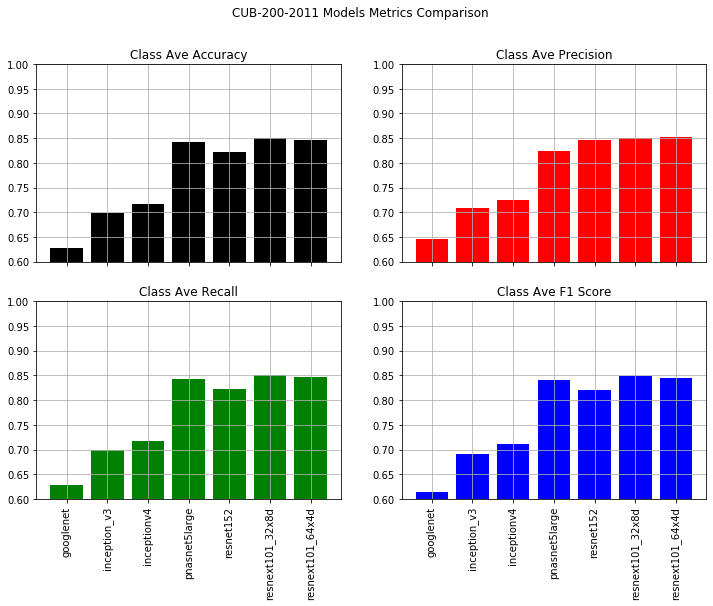

In [65]:
ylim = [0.6, 1.0]

fig = plt.figure(figsize=(12,8))
fig.suptitle('CUB-200-2011 Models Metrics Comparison')

plt.subplot(2,2,1)
plt.bar(models, height=acc, color='black')
plt.xticks(models, '')
plt.ylim(ylim)
plt.grid(True)
plt.title('Class Ave Accuracy')

plt.subplot(2,2,2)
plt.bar(models, height=precision, color='red')
plt.xticks(models, '')
plt.ylim(ylim)
plt.grid(True)
plt.title('Class Ave Precision')

plt.subplot(2,2,3)
plt.bar(models, height=recall, color='green')
plt.xticks(rotation=90)
plt.ylim(ylim)
plt.grid(True)
plt.title('Class Ave Recall')

plt.subplot(2,2,4)
plt.bar(models, height=f1_score, color='blue')
plt.xticks(rotation=90)
plt.ylim(ylim)
plt.grid(True)
plt.title('Class Ave F1 Score')

plt.show()